# `GPUTree` 설명자

이 노트북은 몇 가지 간단한 데이터 세트에서 GPUTree 설명자를 사용하는 방법을 보여줍니다. Tree 설명자와 마찬가지로 GPUTree 설명자는 트리 기반 머신 러닝 모델을 위해 특별히 설계되었지만, NVIDA GPU를 사용하여 계산을 가속화하도록 설계되었습니다.

GPUTree 설명자를 사용하려면 NVIDA GPU가 있어야 하며, 시스템의 현재 GPU 라이브러리를 지원하도록 SHAP이 컴파일되어 있어야 합니다. 최신 우분투 서버에서 이를 위한 단계는 다음과 같습니다:

1. 터미널에서 `nvcc` 명령(CUDA 컴파일러)을 실행하여 NVIDA CUDA 툴킷이 설치되어 있는지 확인합니다. 이 명령어를 찾을 수 없는 경우 `sudo apt install nvidia-cuda-toolkit`과 같은 명령어를 사용하여 설치해야 합니다.
2. NVIDA CUDA 툴킷이 설치되면 CUDA_PATH 환경 변수를 설정해야 합니다. 만약 `어떤 nvcc`가 `/usr/bin/nvcc`를 생성한다면, `export CUDA_PATH=/usr`을 실행하면 됩니다.
3. 'git clone https://github.com/slundberg/shap.git'을 사용하여 shap 리포지토리를 복제하고 'python setup.py install --user'를 실행하여 CUDA가 지원되는 SHAP을 빌드합니다.

위의 지침에 문제가 있는 경우, 새 설치를 시작하기 전에 'import shap'가 실패하는지 확인하여 이전 버전의 SHAP이 남아 있지 않은지 확인하세요.

아래에서는 간단한 성인 소득 분류 데이터 세트와 모델에서 GPUTree 설명자를 사용하는 방법을 보여줍니다.

In [1]:
import shap
import xgboost

# 소득 예측에 대한 데이터 세트 가져오기
X,y = shap.datasets.adult()

# XGBoost 모델을 훈련합니다(다른 모델 유형도 작동 가능).
model = xgboost.XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## 독립적(샤플리 값) 마스킹이 적용된 테이블 형식 데이터

In [2]:
# 순열 설명자를 구축하고 주어진 데이터 세트에 대한 모델 예측을 설명합니다.
explainer = shap.explainers.GPUTree(model, X)
shap_values = explainer(X)

# 긍정적 인 클래스에 대한 설명 만 얻으십시오.
shap_values = shap_values

### 전역 요약 플롯

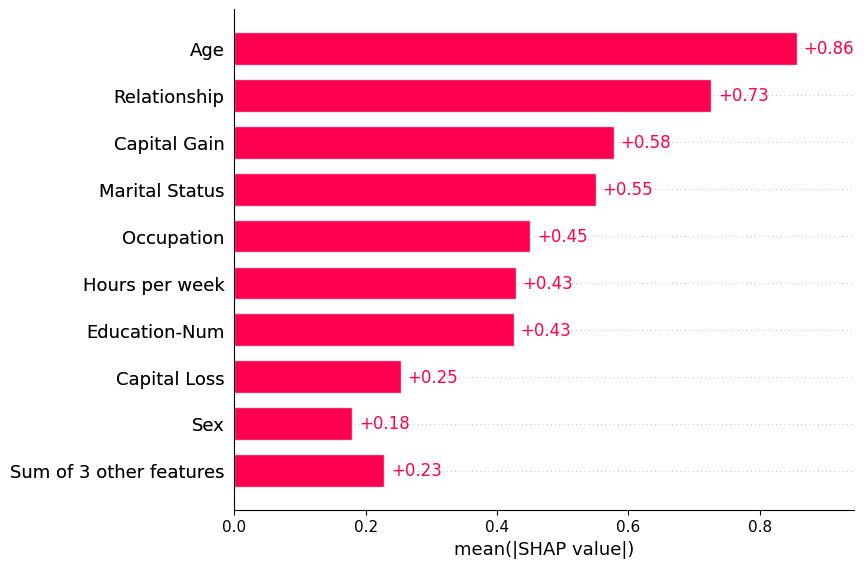

In [3]:
shap.plots.bar(shap_values)

### 단일 인스턴스 플롯

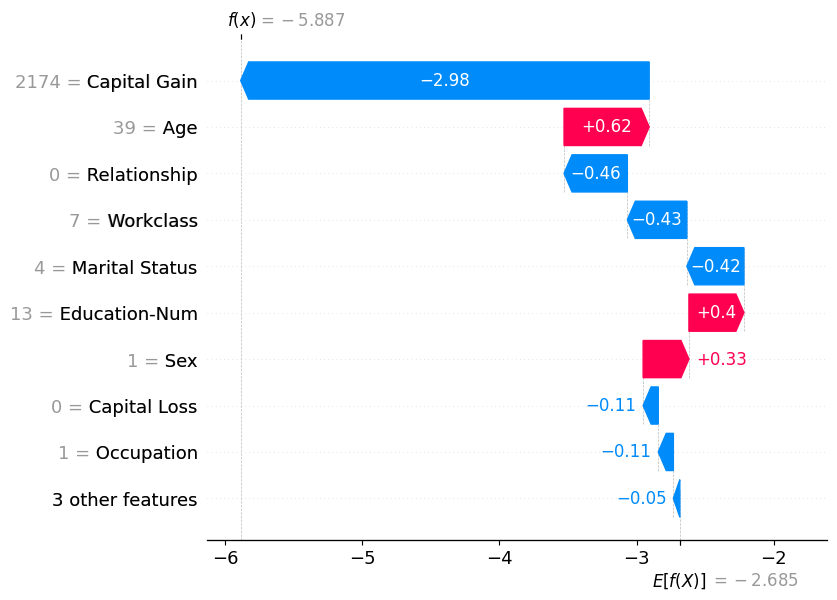

In [4]:
shap.plots.waterfall(shap_values[0])

## 상호작용 값

GPUTree는 샤플리 테일러 상호작용 값을 지원합니다(기존 트리 설명자에서 제공하던 것보다 개선됨).

In [5]:
explainer2 = shap.explainers.GPUTree(model, feature_perturbation="tree_path_dependent")
interaction_shap_values = explainer2(X[:100], interactions=True)

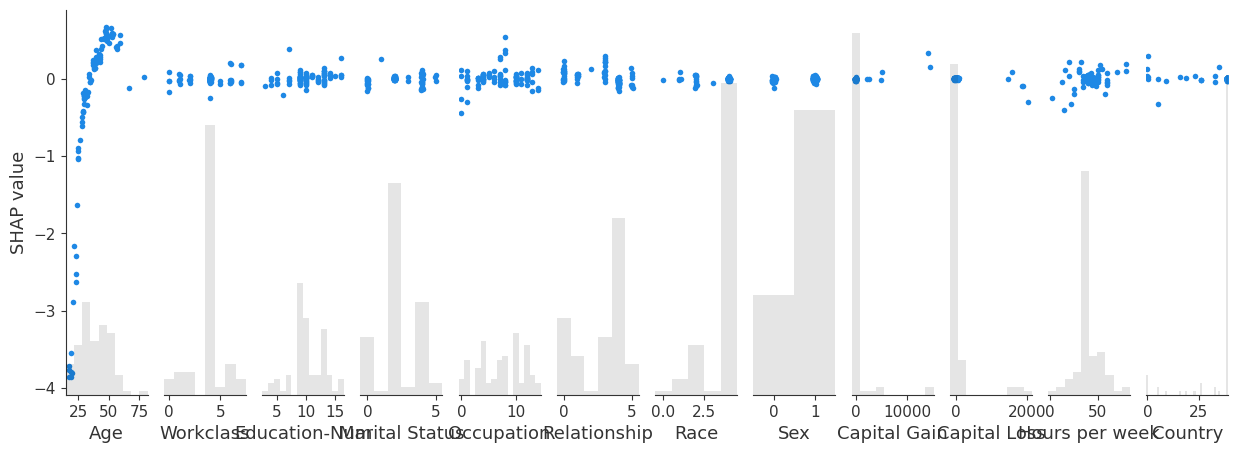

In [6]:
shap.plots.scatter(interaction_shap_values[:,:,0])

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 